In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris=load_iris()

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df['target']=iris.target
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

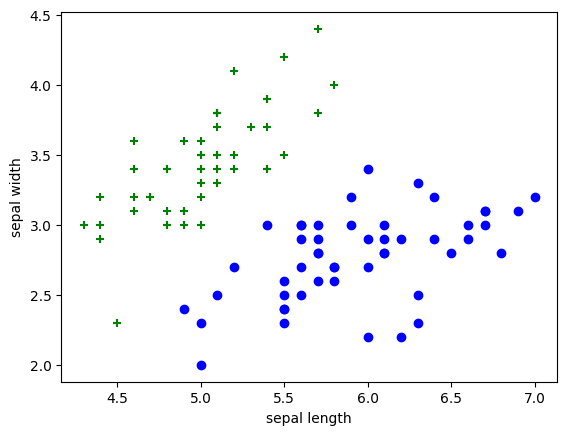

In [14]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue')

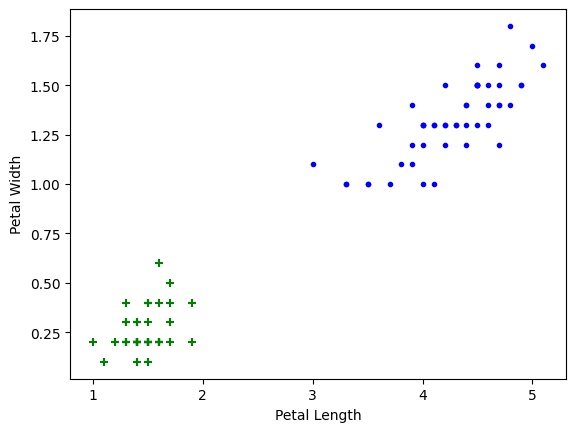

In [17]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [20]:
x = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9666666666666667

In [24]:
from sklearn.metrics import confusion_matrix
yp=knn.predict(x_test)
cm=confusion_matrix(y_test,yp)
cm

array([[12,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

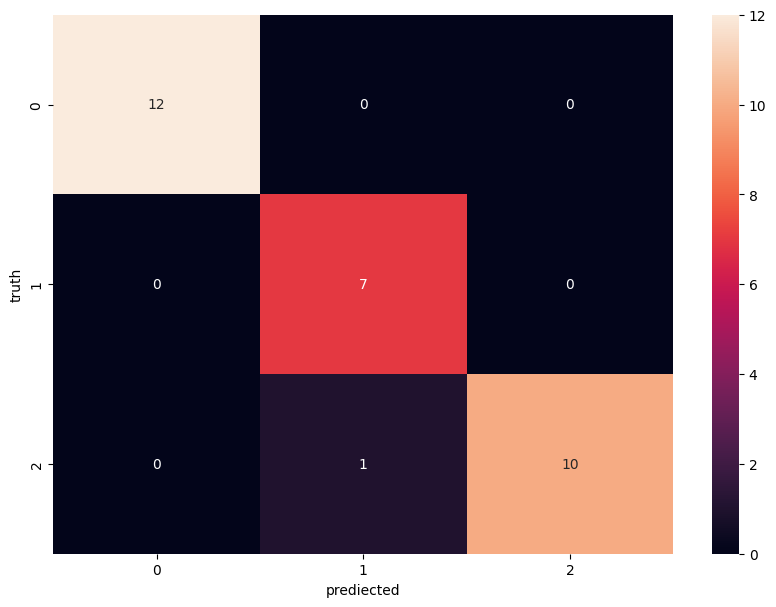

In [25]:
plt.figure(figsize=(10,7))
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('prediected')
plt.ylabel('truth')